# AI for NLP. Lecture 1 Part 1

## Build Graph

In [2]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
{name:'台湾', geoCoord:[121.30,      25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

### Get data from source using regular expression

In [3]:
import re

## regular expression

[a-z]
[A-Z]
[^a]: negation
colou?r:  ? zero or one of its previous character
* : zero or more of its previous character
+: one or more
.:match any single character
^:start of the line
$:end of the line
| [cat|dog] : cat or dog
(da): make the string da like a character


In [4]:
l = "color or colour"

In [5]:
pattern = re.compile("colou?r")
pattern.findall(l)

['color', 'colour']

In [6]:
def get_city_info(city_coordination):
    city_location = {}
    for line in city_coordination.split("\n"):
        if line.startswith("//"): continue
        if line.strip() == "":continue
        
        city = re.findall("name:'(\w+)'",line)[0]
        #print(city)
        x_y = re.findall("Coord:\[(\d+.\d+),\s+(\d+.\d+)\]",line)[0]
        #print(x_y)
        x_y = tuple(map(float,x_y))
        #print('map(float,x_y) :',map(float,x_y))
        #print('x_y :',x_y)
        city_location[city] = x_y
    return city_location

In [7]:
city_info = get_city_info(coordination_source)

In [8]:
city_info

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '海口': (110.35, 20.02),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '台湾': (121.3, 25.03),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '西藏': (91.11, 29.97),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

### Compute distance between cities

In [9]:
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lon1, lat1 = origin
    lon2, lat2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [10]:
def geo_distance_2(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lon1, lat1 = origin
    lon2, lat2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (1-math.sin(math.radians(lat1))*math.sin(math.radians(lat2))-math.cos(math.radians(lat1))*math.cos(math.radians(lat2))*math.cos(dlon))/2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [11]:
origin=(116.46,39.92)
destination=(121.3, 25.0)
print(geo_distance(origin,destination))
print(geo_distance_2(origin,destination))

1719.2900007288047
1719.2900007288058


In [12]:
def get_city_distance(city1,city2):
    return geo_distance(city_info[city1],city_info[city2])

### Draw the graph

In [13]:
get_city_distance("台湾","哈尔滨")

2352.6941830753503

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
#%matplotlib inline



In [15]:
from matplotlib.font_manager import _rebuild
_rebuild()
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [16]:
city_info.keys()

dict_keys(['兰州', '嘉峪关', '西宁', '成都', '石家庄', '拉萨', '贵阳', '武汉', '郑州', '济南', '南京', '合肥', '杭州', '南昌', '福州', '广州', '长沙', '海口', '沈阳', '长春', '哈尔滨', '太原', '西安', '台湾', '北京', '上海', '重庆', '天津', '呼和浩特', '南宁', '西藏', '银川', '乌鲁木齐', '香港', '澳门'])

In [17]:
city_graph = nx.Graph()

city_graph.add_nodes_from(list(city_info.keys()))
                        

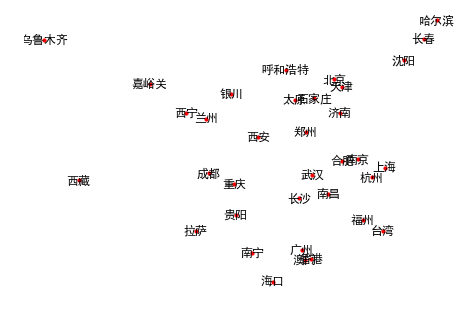

In [18]:
nx.draw(city_graph, city_info, with_labels=True, node_size=10)

### Build connection between. Let's assume that two cities are connected if their distance is less than 700 km.

In [19]:
threshold = 700   # defined the threshold

In [20]:
from collections import defaultdict

In [21]:
def build_connection(city_info):
    cities_connection = defaultdict(list)
    cities = list(city_info.keys())
    for c1 in cities:
        for c2 in cities:
            if c1 == c2 : continue
            
            if get_city_distance(c1,c2) < threshold:
                cities_connection[c1].append(c2)
    return cities_connection

cities_connection = build_connection(city_info)

In [22]:
cities_connection

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '西安', '银川'],
             '嘉峪关': ['兰州', '西宁'],
             '西宁': ['兰州', '嘉峪关', '成都', '银川'],
             '成都': ['兰州', '西宁', '拉萨', '贵阳', '西安', '重庆'],
             '石家庄': ['郑州', '济南', '太原', '西安', '北京', '天津', '呼和浩特'],
             '拉萨': ['成都', '贵阳', '重庆', '南宁'],
             '贵阳': ['成都', '拉萨', '长沙', '重庆', '南宁'],
             '武汉': ['郑州', '南京', '合肥', '杭州', '南昌', '福州', '长沙', '西安', '上海'],
             '郑州': ['石家庄',
              '武汉',
              '济南',
              '南京',
              '合肥',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特'],
             '济南': ['石家庄', '郑州', '南京', '合肥', '太原', '北京', '天津', '呼和浩特'],
             '南京': ['武汉', '郑州', '济南', '合肥', '杭州', '南昌', '福州', '上海'],
             '合肥': ['武汉', '郑州', '济南', '南京', '杭州', '南昌', '福州', '长沙', '上海'],
             '杭州': ['武汉', '南京', '合肥', '南昌', '福州', '台湾', '上海'],
             '南昌': ['武汉', '南京', '合肥', '杭州', '福州', '广州', '长沙', '台湾',

### Draw connection graph

In [23]:
cities_connection_graph = nx.Graph(cities_connection)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


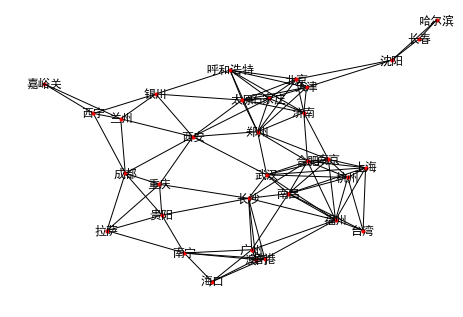

In [24]:
nx.draw(cities_connection_graph,city_info,with_labels=True,node_size=10)

### BFS 1 version

In [25]:
#BFS versoin1
def search_1(graph,start,destination):
    pathes = [[start]]  # list 用来存储待搜索路径[['A']]
    visited = [] # set用来存储已搜索的节点
    
    while pathes:
        path = pathes.pop(0)  #提取第一条路径path=['A'] , pathes=[]
        frontier = path[-1]   #提取即将要探索的节点frontier='A'

        if frontier in visited: continue  #检查如果该点已经探索过 则不用再探索
        #print(frontier)
        successsors = graph[frontier] #successors = graph['A'] = ['B','C','E']
        
        for city in successsors:      #遍历子节点
            if city in path: continue  # check loop #检查会不会形成环
            
            new_path = path+[city] #new_path = ['A']+['B']
            
            pathes.append(new_path)  #bfs     #将新路径加到list里面 pathes=[['A','B']]
            #print('pathes::',pathes)
            #pathes = [new_path] + pathes #dfs
            
            if city == destination:  #检查目的地是不是已经搜索到了 
                return new_path #return ['A',....,'destination']
        visited.append(frontier) #搜過的節點直接跳過 visited = set('A')
        

In [26]:
search_1(cities_connection,"哈尔滨","海口")

['哈尔滨', '沈阳', '北京', '郑州', '武汉', '南昌', '广州', '海口']

### Optimal search using variation of BFS

In [27]:
def search_2(graph,start,destination,search_strategy):
    pathes = [[start]]
    visited = set()# ！
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        if froniter in visited : continue# ！
            
        if froniter == destination:# ！
            return path# ！
        
        successsors = graph[froniter]
        
        for city in successsors:
            if city in path: continue  # check loop
            
            new_path = path+[city]
            
            pathes.append(new_path)  #bfs
            
        pathes = search_strategy(pathes) 
        ''' 在进入下一轮搜索前先先用search strategy对pathes排序，
        下一轮就可以先搜索最需要先被搜索的path。(这里只有考虑已经走
        过的路径距离加总，如果还要考虑最后到destination 的距离的话，
        要在pathes每个元素最后加上destinatioin。)'''
        visited.add(froniter) # ！
       # if pathes and (destination == pathes[0][-1]):
       #     return pathes[0]  
        

In [28]:
def sort_by_distance(pathes):
    def get_distance_of_path(path):
        distance = 0
        for i,_ in enumerate(path[:-1]):
            distance += get_city_distance(path[i],path[i+1])
        return distance
    return sorted(pathes,key=get_distance_of_path)
#函数可以定义在函数里面@@

In [29]:
def get_distance_of_path(path):
    distance = 0
    for i,_ in enumerate(path[:-1]):
        distance += get_city_distance(path[i],path[i+1])
    return distance

In [36]:
get_distance_of_path(["北京","上海"])

1068.1567232158195

In [32]:
get_distance_of_path(["北京","天津","上海"])

1069.7878955717392

In [34]:
#没考虑距离，单纯根据节点搜索
search_2(cities_connection,"北京","上海",search_strategy=lambda x:x)

['北京', '郑州', '武汉', '上海']

In [35]:
#考虑搜索过的路径的距离
search_2(cities_connection,"北京","上海",search_strategy=sort_by_distance)

['北京', '济南', '南京', '上海']

# AI for NLP Lecture 1 Part 2

## Machine Learning

In [2]:
from sklearn.datasets import load_boston
import random

In [3]:
dataset = load_boston()

In [4]:
dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
x,y=dataset['data'],dataset['target']

In [6]:
x.shape

(506, 13)

In [7]:
dataset['feature_names'].shape

(13,)

In [8]:
y.shape

(506,)

In [9]:
print(x[1].shape)
x[1]

(13,)


array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [10]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
dataset['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [12]:
X_rm = x[:,5]

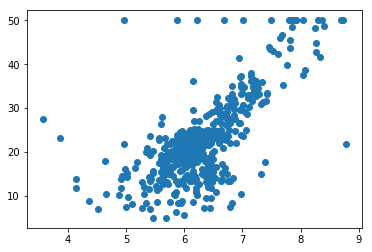

In [15]:
# plot the RM with respect to y
plt.scatter(X_rm,y)

### Gradient descent

### Assume that the target funciton is a linear function
$$ y = k*rm + b$$

In [16]:
#define target function
def price(rm, k, b):
    return k * rm + b

### Define mean square loss

$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2$$

$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))}^2 $$

In [17]:
# define loss function 
def loss(y,y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

### Define partial derivatives

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$


$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

In [18]:
# define partial derivative 
def partial_derivative_k(x, y, y_hat): 
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i-y_hat_i) * x_i
    return -2/n * gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i-y_hat_i)
    return -2 / n * gradient

In [19]:
#initialized parameters

k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-3

iteration_num = 200 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

58906
Iteration 16, the loss is 9323.792019864957, parameters k is -2.716754123941141 and b is -56.369264871092696
Iteration 17, the loss is 7865.740002178164, parameters k is -1.4987613280694976 and b is -56.17731311592369
Iteration 18, the loss is 6636.883005937294, parameters k is -0.380594643946605 and b is -56.001054543081985
Iteration 19, the loss is 5601.193259007467, parameters k is 0.6459271378264537 and b is -55.83920302497362
Iteration 20, the loss is 4728.306290126853, parameters k is 1.5883147388886623 and b is -55.69057783807967
Iteration 21, the loss is 3992.6306996508874, parameters k is 2.4534633426765615 and b is -55.5540950246072
Iteration 22, the loss is 3372.597867789558, parameters k is 3.2477030406126275 and b is -55.42875946209275
Iteration 23, the loss is 2850.0296031932344, parameters k is 3.976845143996362 and b is -55.31365758293823
Iteration 24, the loss is 2409.6051925310753, parameters k is 4.6462247004227795 and b is -55.207950690614396
Iteration 25, the

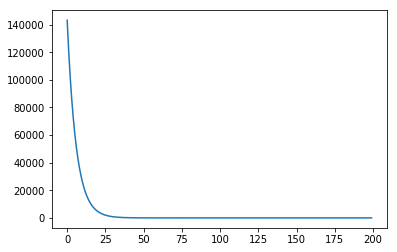

In [20]:
plt.plot(list(range(iteration_num)),losses)

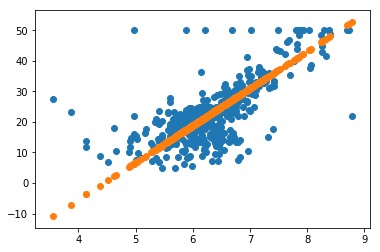

In [21]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)